# Imports

We'll start this notebook just as any other, with the import statements for all necessary libraries. We'll be using standard libraries: numpy, pandas, matplotlib, seaborn, and sklearn. 

In [102]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# IPython utility for inline figure sizing
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale=2)

# Imputing missing values and scaling values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Load Data

We'll start by loading the data that was split into training and test datasets in the previous notebook. Then we can refresh ourselves on the shapes of these datasets, take a preview of the first few rows, and also replot the distribution of the target variable. 

In [103]:
# Read in training and test dataframes
train_features = pd.read_csv('../data/training_features.csv')
train_labels = pd.read_csv('../data/training_labels.csv')
test_features = pd.read_csv('../data/testing_features.csv')
test_labels = pd.read_csv('../data/testing_labels.csv')

In [104]:
# Print shape of data
print(f'Training Features: {train_features.shape}')
print(f'Training Labels  : {train_labels.shape}')
print(f'Testing Features : {test_features.shape}')
print(f'Testing Labels   : {test_labels.shape}')

Training Features: (33905, 116)
Training Labels  : (33905, 1)
Testing Features : (14531, 116)
Testing Labels   : (14531, 1)


In [105]:
train_features.head()

,Calendar Year,Year Built,Number of Buildings,Occupancy,National Median ENERGY STAR Score,Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Electricity - Weather Normalized Site Electricity Intensity (Grid and Onsite Renewables) (kWh/ft²),Natural Gas - Weather Normalized Site Natural Gas Intensity (therms/ft²),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Percent of Electricity that is Green Power,Multifamily Housing - Percent That Can Be Cooled,Multifamily Housing - Percent That Can Be Heated,"Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 sq ft)","Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 sq ft)",Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories),"Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 sq ft)",Water Use (All Water Sources) (kgal),Indoor Water Use (All Water Sources) (kgal),Number of Active Energy Meters - Total,Number of Active Energy Meters - Used to Compute Metrics,Number of Active Energy Meters - Not Used to Compute Metrics,Number of Active IT Meters,Aggregate Meter(s)-Electric – Number of Individual Meters Included,Aggregate Meter(s)-Natural Gas – Number of Individual Meters Included,Aggregate Meter(s)-District Steam – Number of Individual Meters Included,Latitude,Longitude,Community Board,...,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,"Largest Property Use Type_Personal Services (Health/Beauty, Dry Cleaning, etc.)",Largest Property Use Type_Police Station,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Prison/Incarceration,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Living Community,Largest Property Use Type_Single-Family Home,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Stadium (Open),Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Transportation Terminal/Station,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Vehicle Dealership,Largest Property Use Type_Vehicle Repair Services,Largest Property Use Type_Veterinary Office,Largest Property Use Type_Vocational School,Largest Property Use Type_Wastewater Treatment Plant,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility,Largest Property Use Type_Zoo
0,2023,1929,1.0,100,50.0,92.6,90.3,4.2,0.9,0.0,0.0,0.0,100.0,100.0,1.15222,0.00000,71.0,1.15222,NaN,NaN,6.0,6.0,0.0,0.0,0.0,0.0,0.0,40.661834,-73.920931,317.0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2022,1963,1.0,100,50.0,116.6,110.3,3.5,1.1,0.0,0.0,0.0,90.0,100.0,1.46067,0.00000,47.0,1.46067,4170.4,4170.4,5.0,5.0,0.0,0.0,NaN,NaN,NaN,40.745033,-73.891066,404.0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2022,2006,1.0,90,50.0,74.0,71.3,6.7,0.5,0.0,0.0,0.0,100.0,100.0,0.70120,0.00000,38.0,0.70120,1333.0,1333.0,6.0,6.0,0.0,0.0,NaN,NaN,NaN,40.660848,-73.992571,307.0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2022,1999,1.0,100,50.0,76.3,

In [106]:
train_features.describe()

,Calendar Year,Year Built,Number of Buildings,Occupancy,National Median ENERGY STAR Score,Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Electricity - Weather Normalized Site Electricity Intensity (Grid and Onsite Renewables) (kWh/ft²),Natural Gas - Weather Normalized Site Natural Gas Intensity (therms/ft²),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Percent of Electricity that is Green Power,Multifamily Housing - Percent That Can Be Cooled,Multifamily Housing - Percent That Can Be Heated,"Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 sq ft)","Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 sq ft)",Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories),"Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 sq ft)",Water Use (All Water Sources) (kgal),Indoor Water Use (All Water Sources) (kgal),Number of Active Energy Meters - Total,Number of Active Energy Meters - Used to Compute Metrics,Number of Active Energy Meters - Not Used to Compute Metrics,Number of Active IT Meters,Aggregate Meter(s)-Electric – Number of Individual Meters Included,Aggregate Meter(s)-Natural Gas – Number of Individual Meters Included,Aggregate Meter(s)-District Steam – Number of Individual Meters Included,Latitude,Longitude,Community Board,Census Tract (2020),log_Largest Property Use Type - Gross Floor Area (ft²),log_Number of Buildings,log_National Median ENERGY STAR Score,log_Natural Gas Use (kBtu),log_Number of Active Energy Meters - Total,log_Number of Active Energy Meters - Used to Compute Metrics,log_Aggregate Meter(s)-Natural Gas – Number of Individual Meters Included,log_Aggregate Meter(s)-District Steam – Number of Individual Meters Included
count,33905.000000,33905.000000,33905.000000,33905.000000,33905.0,33905.000000,33902.000000,33249.000000,32005.000000,3.348600e+04,3.348600e+04,33426.000000,25572.000000,25572.000000,25573.000000,25573.000000,25573.000000,25573.000000,2.386400e+04,2.348600e+04,33905.000000,33905.000000,33905.000000,33905.000000,17397.000000,17397.0,17397.0,32905.000000,32905.000000,32905.000000,32905.000000,33905.000000,33850.000000,3.390500e+04,31859.000000,33904.000000,33904.000000,0.0,0.0
mean,2022.513110,1950.733432,1.318803,97.674089,50.0,73.389385,82.945053,6.586845,1.248614,5.191845e+03,6.063766e+03,0.144843,80.849961,96.547708,1.014967,0.195512,45.091206,0.616416,5.945783e+03,5.500944e+03,7.915086,7.629081,0.286005,0.003392,0.000920,0.0,0.0,40.749707,-73.935493,233.220149,9036.652910,11.231690,0.074852,3.912023e+00,14.409568,1.810706,1.780191,NaN,NaN
std,0.499835,34.660439,4.148562,9.728391,0.0,32.841723,35.400149,5.382595,7.734900,3.018795e+05,3.030289e+05,2.937847,33.853494,13.711758,0.395267,0.455753,91.548731,0.543666,4.423006e+04,2.235414e+04,14.274657,13.882204,2.173145,0.106231,0.113977,0.0,0.0,0.078751,0.060803,116.141049,21280.152757,0.839042,0.364945,4.440958e-16,1.757852,0.629394,0.620384,NaN,NaN
min,2022.000000,1367.000000,0.000000,0.000000,50.0,-0.400000,1.700000,0.000000,-0.500000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.014150,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,40.510735,-74.243582,101.000000,1.000000,7.161622,0.000000,3.912023e+00,0.693147,0.000000,0.000000,NaN,NaN
25%,2022.000000,1925.000000,1.000000,100.000000,50.0,53.600000,68.300000,3.600000,0.100000,0.000000e+00,0.000000e+00,0.000000,90.000000,100.000000,0.837640,0.000000,0.000000,0.000000,1.647575e+03,1.646200e+03,4.000000,4.000000,0.000000,0.000000,0.000000,0.0,0.0,40.697309,-73.976816,108.000000,145.000000,10.611868,0.000000,3.912023e+00,13.703461,1.386294,1.386294,NaN,NaN
50%,2023.000000,1939.000000,1.000000,100.000000,50.0,72.700000,83.400000,4.900000,0.500000,0.000000e+00,0.000000e+00,0.000000,90.000000,100.000000,0.998670,0.000000,34

Text(0, 0.5, 'Number of Properties')

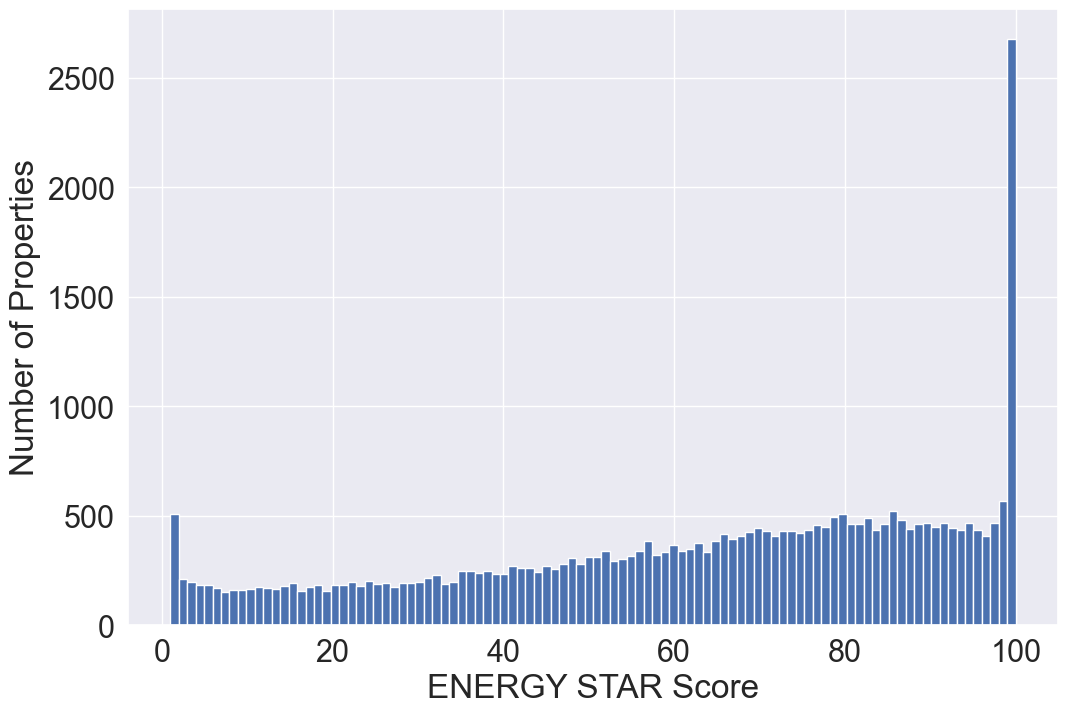

In [107]:
# Plot distribution of Energy Star Scores
fig = plt.figure(figsize=(12,8))
plt.hist(train_labels['ENERGY STAR Score'], bins=100)
plt.xlabel('ENERGY STAR Score')
plt.ylabel('Number of Properties')

# Missing Values

In the EDA notebook, we took care of some missing values by eliminating columsn that had over 50% missing data. Still, we are left with missing information in the remaining columns. Furthermore, we added additional columns into the dataset after this cleanup-process. It will be helpful to remake the missing columns figure, and really understand what data is missing, and how much of it. Based on these factors, we'll decide whether or not we want to impute missing figures, or remove relevant rows and columns. 

We'll start by plotting a distribution of columns based on the % of their missing data.

Dataframe has 116 columns.
27 columns have missing information.
                                                    Missing Values  % of Total
log_Aggregate Meter(s)-District Steam – Number ...           33905  100.000000
log_Aggregate Meter(s)-Natural Gas – Number of ...           33905  100.000000
Aggregate Meter(s)-Electric – Number of Individ...           16508   48.688984
Aggregate Meter(s)-District Steam – Number of I...           16508   48.688984
Aggregate Meter(s)-Natural Gas – Number of Indi...           16508   48.688984
...                                                            ...         ...
Largest Property Use Type_Fitness Center/Health...               0    0.000000
Largest Property Use Type_Fire Station                           0    0.000000
Largest Property Use Type_Financial Office                       0    0.000000
Largest Property Use Type_Fast Food Restaurant                   0    0.000000
Largest Property Use Type_Zoo                                    0 

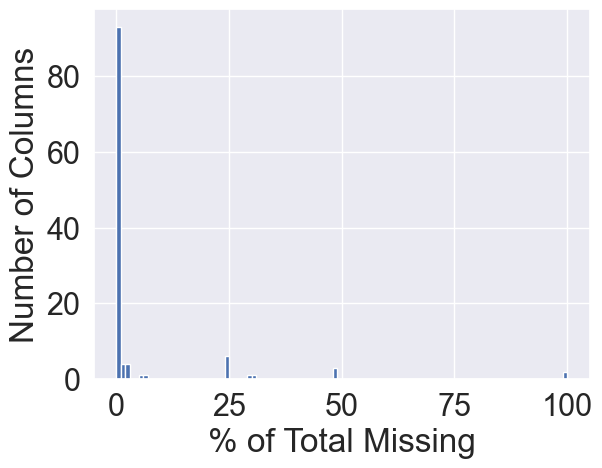

In [108]:
def missing_values(df):
    # total missing values per column
    total_missing = df.isnull().sum()

    # percentage of missing values
    percent_missing = 100* (total_missing / len(df))

    # missing value table
    table = pd.concat([total_missing, percent_missing], axis=1)

    # rename the columns
    table = table.rename(
        columns = {0: 'Missing Values', 1: '% of Total'}
    )

    # sort by percentage, descending
    table = table.sort_values(by='% of Total', ascending=False)

    # print summmary information
    print(f"Dataframe has {df.shape[1]} columns.")
    print(f"{len(table[table['% of Total']!=0])} columns have missing information.")

    return table

missing_data_table = missing_values(train_features)

fig = plt.figure()
missing_data_table['% of Total'].hist(bins=100)
plt.xlabel('% of Total Missing')
plt.ylabel('Number of Columns')

print(missing_data_table)

Bin sizes in the figure above are equivalent to 1%. There is a small peak at 100%, and the other (visible) bars are all below 50%. A column with 100% missing data gives us no new information, so we'll filter out these columns and remove them from both the training dataset and test dataset. This is important as we want to keep the features identical between these datasets.

In [ ]:
# Get list of column names that have 100% missing values
columns_to_drop = list(missing_data_table[missing_data_table['% of Total']==100].index)
print("Dropping the following columns:")
for each in columns_to_drop:
    print(each)

# Drop from training and test datasets 
train_features = train_features.drop(columns_to_drop, axis=1)
test_features = test_features.drop(columns_to_drop, axis=1)

Dropping the following columns:
log_Aggregate Meter(s)-District Steam – Number of Individual Meters Included
log_Aggregate Meter(s)-Natural Gas – Number of Individual Meters Included


Dataframe has 114 columns.
25 columns have missing information.


Text(0, 0.5, 'Number of Columns')

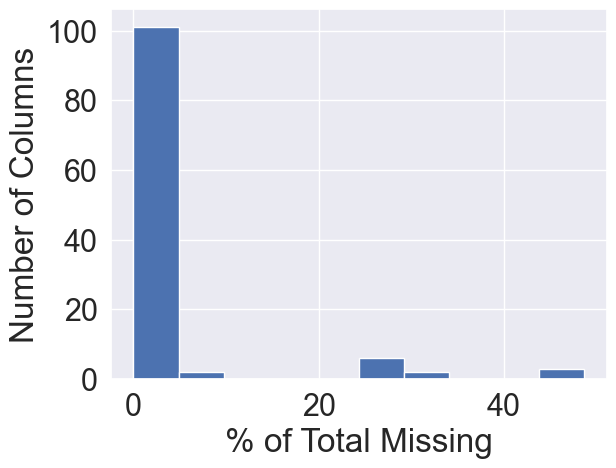

In [110]:
missing_data_table = missing_values(train_features)

fig = plt.figure()
missing_data_table['% of Total'].hist()
plt.xlabel('% of Total Missing')
plt.ylabel('Number of Columns')

In [111]:
print(missing_data_table[missing_data_table['% of Total']>0])

                                                    Missing Values  % of Total
Aggregate Meter(s)-District Steam – Number of I...           16508   48.688984
Aggregate Meter(s)-Natural Gas – Number of Indi...           16508   48.688984
Aggregate Meter(s)-Electric – Number of Individ...           16508   48.688984
Indoor Water Use (All Water Sources) (kgal)                  10419   30.729981
Water Use (All Water Sources) (kgal)                         10041   29.615101
Multifamily Housing - Percent That Can Be Cooled              8333   24.577496
Multifamily Housing - Percent That Can Be Heated              8333   24.577496
Multifamily Housing - Number of Residential Liv...            8332   24.574547
Multifamily Housing - Number of Residential Liv...            8332   24.574547
Multifamily Housing - Number of Residential Liv...            8332   24.574547
Multifamily Housing - Total Number of Residenti...            8332   24.574547
log_Natural Gas Use (kBtu)                          

In [112]:
column_name = 'Aggregate Meter(s)-District Steam – Number of Individual Meters Included'
print(train_features[column_name].describe())
print(train_features[column_name].head(10))

column_name = 'Aggregate Meter(s)-Electric – Number of Individual Meters Included'
print(train_features[column_name].describe())
print(train_features[column_name].head(10))

column_name = 'Aggregate Meter(s)-Natural Gas – Number of Individual Meters Included'
print(train_features[column_name].describe())
print(train_features[column_name].head(10))

count    17397.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Aggregate Meter(s)-District Steam – Number of Individual Meters Included, dtype: float64
0    0.0
1    NaN
2    NaN
3    NaN
4    0.0
5    NaN
6    0.0
7    NaN
8    NaN
9    NaN
Name: Aggregate Meter(s)-District Steam – Number of Individual Meters Included, dtype: float64
count    17397.000000
mean         0.000920
std          0.113977
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: Aggregate Meter(s)-Electric – Number of Individual Meters Included, dtype: float64
0    0.0
1    NaN
2    NaN
3    NaN
4    0.0
5    NaN
6    0.0
7    NaN
8    NaN
9    NaN
Name: Aggregate Meter(s)-Electric – Number of Individual Meters Included, dtype: float64
count    17397.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name

In [113]:
# drop aggregate columns since they hold no information
columns_to_drop = [
    'Aggregate Meter(s)-District Steam – Number of Individual Meters Included',
    'Aggregate Meter(s)-Electric – Number of Individual Meters Included',
    'Aggregate Meter(s)-Natural Gas – Number of Individual Meters Included' 
]
train_features = train_features.drop(columns_to_drop, axis=1)
test_features = test_features.drop(columns_to_drop, axis=1)

print(train_features.shape)
print(test_features.shape)

(33905, 111)
(14531, 111)


In [114]:
column_name = 'Indoor Water Use (All Water Sources) (kgal)'
train_features[column_name].describe()

count    2.348600e+04
mean     5.500944e+03
std      2.235414e+04
min      0.000000e+00
25%      1.646200e+03
50%      3.326800e+03
75%      6.003900e+03
max      2.985078e+06
Name: Indoor Water Use (All Water Sources) (kgal), dtype: float64

In [115]:
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Fit on the training features
imputer.fit(train_features)

# Transform both training and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)